In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../EEG_data.csv')
df

SubjectID  VideoID  Attention  Mediation    Raw      Delta      Theta  \
0            0.0      0.0       56.0       43.0  278.0   301963.0    90612.0   
1            0.0      0.0       40.0       35.0  -50.0    73787.0    28083.0   
2            0.0      0.0       47.0       48.0  101.0   758353.0   383745.0   
3            0.0      0.0       47.0       57.0   -5.0  2012240.0   129350.0   
4            0.0      0.0       44.0       53.0   -8.0  1005145.0   354328.0   
...          ...      ...        ...        ...    ...        ...        ...   
12806        9.0      9.0       64.0       38.0  -39.0   127574.0     9951.0   
12807        9.0      9.0       61.0       35.0 -275.0   323061.0   797464.0   
12808        9.0      9.0       60.0       29.0 -426.0   680989.0   154296.0   
12809        9.0      9.0       60.0       29.0  -84.0   366269.0    27346.0   
12810        9.0      9.0       64.0       29.0  -49.0  1164555.0  1184366.0   

         Alpha1    Alpha2    Beta1     Beta2   Gamma1   Gamma2  \
0       33735.0   23991.0  27946.0   45097.0  33228.0   8293.0   
1        1439.0    2240.0   2746.0    3687.0   5293.0   2740.0   
2      201999.0   62107.0  36293.0  130536.0  57243.0  25354.0   
3       61236.0   17084.0  11488.0   62462.0  49960.0  33932.0   
4       37102.0   88881.0  45307.0   99603.0  44790.0  29749.0   
...         ...       ...      ...       ...      ...      ...   
12806     709.0   21732.0   3872.0   39728.0   2598.0    960.0   
12807  153171.0  145805.0  39829.0  571280.0  36574.0  10010.0   
12808   40068.0   39122.0  10966.0   26975.0  20427.0   2024.0   
12809   11444.0    9932.0   1939.0    3283.0  12323.0   1764.0   
12810   50014.0  124208.0  10634.0  445383.0  22133.0   4482.0   

       predefinedlabel  user-definedlabeln  
0                  0.0                 0.0  
1                  0.0                 0.0  
2                  0.0                 0.0  
3                  0.0                 0.0  
4                  0.0                 0.0  
...                ...                 ...  
12806              1.0                 0.0  
12807              1.0                 0.0  
12808              1.0                 0.0  
12809              1.0                 0.0  
12810              1.0                 0.0  

[12811 rows x 15 columns]

In [4]:
df = df.rename(columns={"user-definedlabeln": "userlabel"})

In [ ]:
# df_new = pd.DataFrame()  # Initialize an empty DataFrame

# for i in range(10):
#     for j in range(10):
#         query = "SubjectID == "+str(i)+" & VideoID == "+str(j)
#         df_temp = df.query(query)
#         df_temp = df_temp.reset_index(drop=True)
#         df_temp["timepoint"] = df_temp.index  # Adding a new "timepoint" column
#         df_new = pd.concat([df_new, df_temp], ignore_index=True)

# df_new.head()

In [5]:
df_new = df.reset_index().drop(df.index)

for i in range(0,10):
  for j in range(0,10):
    query = "SubjectID == "+str(i)+" & VideoID == "+str(j)
    df_temp = df.query(query)
    df_temp = df_temp.reset_index(drop=True)
    df_temp = df_temp.reset_index()
    # print(df_temp)
    df_new = pd.concat([df_new, df_temp])

df_new = df_new.rename(columns={"index": "timepoint"})
df_new = df_new.reset_index(drop=True)
df_new.head()

timepoint  SubjectID  VideoID  Attention  Mediation    Raw      Delta  \
0          0        0.0      0.0       56.0       43.0  278.0   301963.0   
1          1        0.0      0.0       40.0       35.0  -50.0    73787.0   
2          2        0.0      0.0       47.0       48.0  101.0   758353.0   
3          3        0.0      0.0       47.0       57.0   -5.0  2012240.0   
4          4        0.0      0.0       44.0       53.0   -8.0  1005145.0   

      Theta    Alpha1   Alpha2    Beta1     Beta2   Gamma1   Gamma2  \
0   90612.0   33735.0  23991.0  27946.0   45097.0  33228.0   8293.0   
1   28083.0    1439.0   2240.0   2746.0    3687.0   5293.0   2740.0   
2  383745.0  201999.0  62107.0  36293.0  130536.0  57243.0  25354.0   
3  129350.0   61236.0  17084.0  11488.0   62462.0  49960.0  33932.0   
4  354328.0   37102.0  88881.0  45307.0   99603.0  44790.0  29749.0   

   predefinedlabel  userlabel  
0              0.0        0.0  
1              0.0        0.0  
2              0.0        0.0  
3              0.0        0.0  
4              0.0        0.0

In [45]:
# your_dataframe = pd.DataFrame(df_new)

# # Specify the file path where you want to save the CSV file
# file_path = '../new_df.csv'

# # Save the DataFrame to a CSV file
# your_dataframe.to_csv(file_path, index=False)


Pearson's correlation coefficient. For two variables, X and Y, the Pearson correlation coefficient (r) is calculated as follows:
$r=\frac{\sum\left(X_i-\bar{X}\right)\left(Y_i-\bar{Y}\right)}{\sqrt{\sum\left(X_i-\bar{X}\right)^2 \sum\left(Y_i-\bar{Y}\right)^2}}$
where:
- $X_i$ and $Y_i$ are individual data points of $\mathrm{X}$ and $\mathrm{Y}$.
- $\bar{X}$ and $\bar{Y}$ are the means of $X$ and $Y$, respectively.

The values in the correlation matrix range(r) from -1 to 1:
- 1: Perfect positive correlation
- 0: No correlation
- -1: Perfect negative correlation

<Axes: >

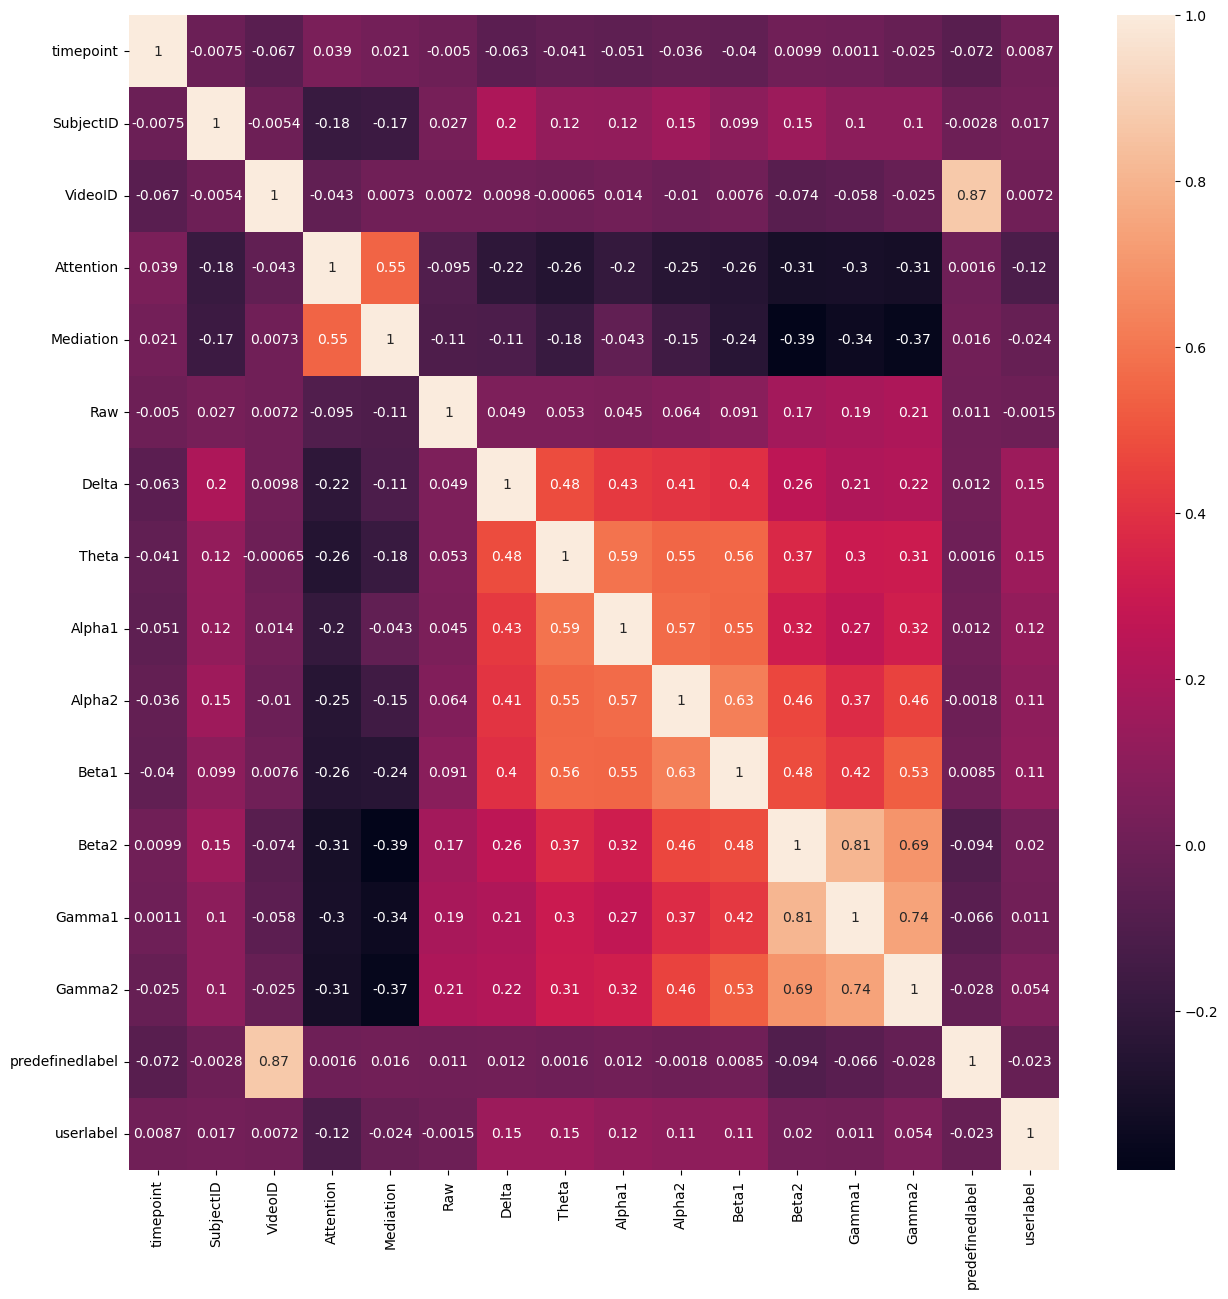

In [6]:
plt.figure(figsize = (15,15))
cor_matrix = df_new.corr()
sns.heatmap(cor_matrix,annot=True)

creating a 5x2 subplot grid and obtaining the array of Axes objects (`axs`) to which you'll later plot your line charts.
- fig, axs = plt.subplots(5, 2)<br>

In plot asx[0,0] means first row and first column
  - sns.lineplot(data=df_confused, x="timepoint", y="Attention",errorbar=None, ax=axs[0,0])
  - sns.lineplot(data=df_understand, x="timepoint", y="Attention",errorbar=None, ax=axs[0,0])<br>
    
in plot asx[0,1] means first row and second column<br>
  - sns.lineplot(data=df_confused, x="timepoint", y="Confusion",errorbar=None, ax=axs[0,1])
  - sns.lineplot(data=df_understand, x="timepoint", y="Confusion",errorbar=None, ax=axs[0,1])


In [7]:
def draw_multiple_figures(df_confused,df_understand):
  sns.set(rc={'figure.figsize':(30,10)})

  fig, axs = plt.subplots(5, 2)

  sns.lineplot(data=df_confused, x="timepoint", y="Attention",errorbar=None, ax=axs[0,0])
  sns.lineplot(data=df_understand, x="timepoint", y="Attention",errorbar=None, ax=axs[0,0])

  sns.lineplot(data=df_confused, x="timepoint", y="Mediation",errorbar=None, ax=axs[0,1])
  sns.lineplot(data=df_understand, x="timepoint", y="Mediation",errorbar=None, ax=axs[0,1])

  sns.lineplot(data=df_confused, x="timepoint", y="Alpha1",errorbar=None, ax=axs[1,0])
  sns.lineplot(data=df_understand, x="timepoint", y="Alpha1",errorbar=None, ax=axs[1,0])

  sns.lineplot(data=df_confused, x="timepoint", y="Alpha2",errorbar=None, ax=axs[1,1])
  sns.lineplot(data=df_understand, x="timepoint", y="Alpha2",errorbar=None, ax=axs[1,1])

  sns.lineplot(data=df_confused, x="timepoint", y="Beta1",errorbar=None, ax=axs[2,0])
  sns.lineplot(data=df_understand, x="timepoint", y="Beta1",errorbar=None, ax=axs[2,0])

  sns.lineplot(data=df_confused, x="timepoint", y="Beta2",errorbar=None, ax=axs[2,1])
  sns.lineplot(data=df_understand, x="timepoint", y="Beta2",errorbar=None, ax=axs[2,1])

  sns.lineplot(data=df_confused, x="timepoint", y="Gamma1",errorbar=None, ax=axs[3,0])
  sns.lineplot(data=df_understand, x="timepoint", y="Gamma1",errorbar=None, ax=axs[3,0])

  sns.lineplot(data=df_confused, x="timepoint", y="Gamma2",errorbar=None, ax=axs[3,1])
  sns.lineplot(data=df_understand, x="timepoint", y="Gamma2",errorbar=None, ax=axs[3,1])

  sns.lineplot(data=df_confused, x="timepoint", y="Delta",errorbar=None, ax=axs[4,0])
  sns.lineplot(data=df_understand, x="timepoint", y="Delta",errorbar=None, ax=axs[4,0])

  sns.lineplot(data=df_confused, x="timepoint", y="Theta",errorbar=None, ax=axs[4,1])
  sns.lineplot(data=df_understand, x="timepoint", y="Theta",errorbar=None, ax=axs[4,1])

  fig.legend(labels=['confused','not confused'], loc="lower center", ncol=2)
  fig.suptitle("Confused vs Not Confused by Groups of Frequency")

  plt.show()

### Compare the labels by averaging the signals grouped according to their respective labels.

In the next step, we aim to compare the timepoints of confused versus not confused signals. To achieve this, we will categorize the signals into `three categories` based on the method of labeling: `labeled by the author("predefinedlabel")`, `labeled by the subjects("user-definedlabeln" as "userlabel")`, and labeled by `both` the author and the subjects.
- 1: Dyslexic
- 0: Non-dyslexic

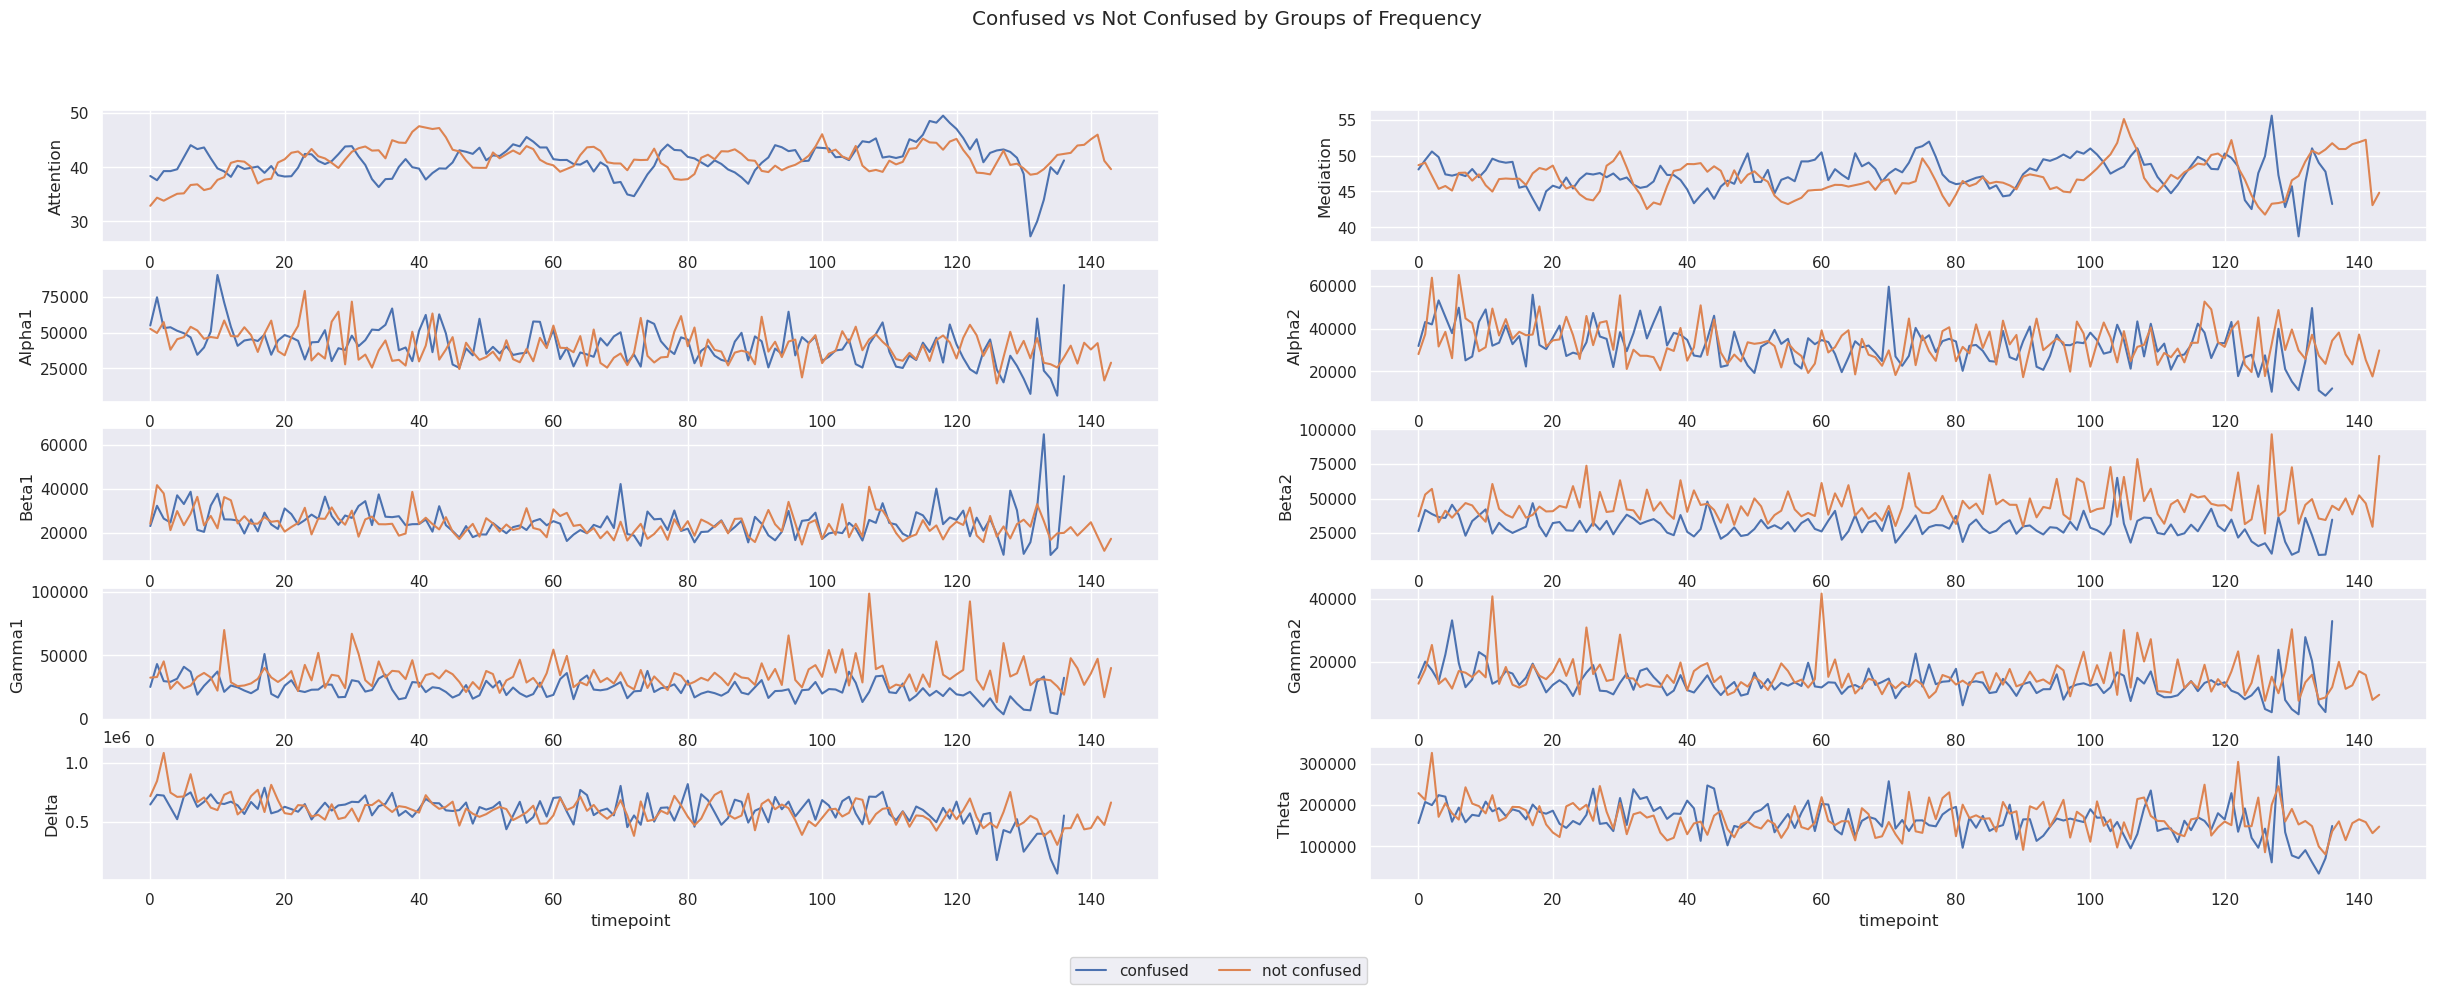

In [8]:
query = "predefinedlabel == 1"
df_confused = df_new.query(query)

query = "predefinedlabel == 0"
df_understand = df_new.query(query)

draw_multiple_figures(df_confused,df_understand)

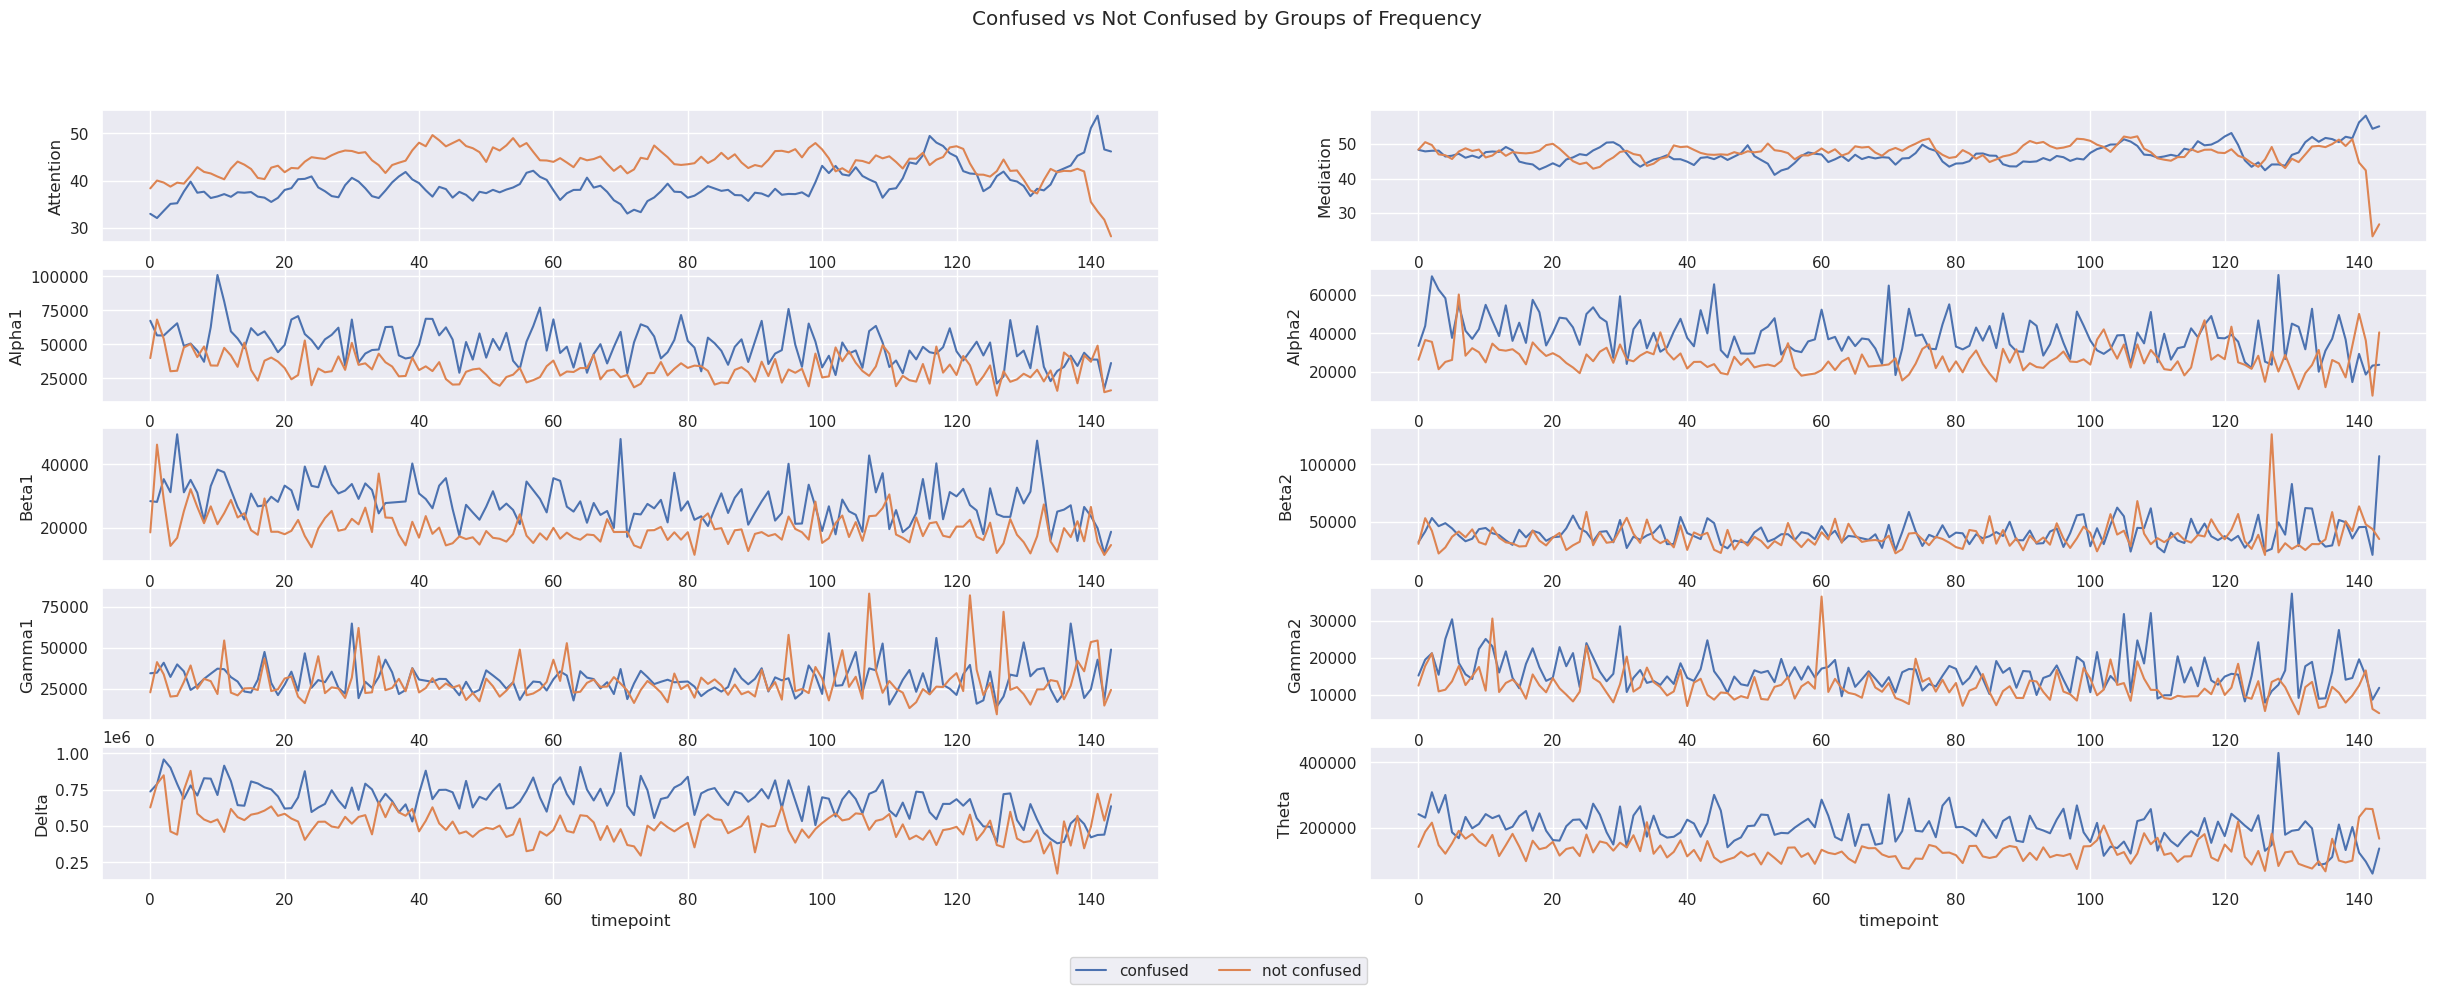

In [9]:
query = "userlabel == 1"
df_confused = df_new.query(query)

query = "userlabel == 0"
df_understand = df_new.query(query)

draw_multiple_figures(df_confused,df_understand)

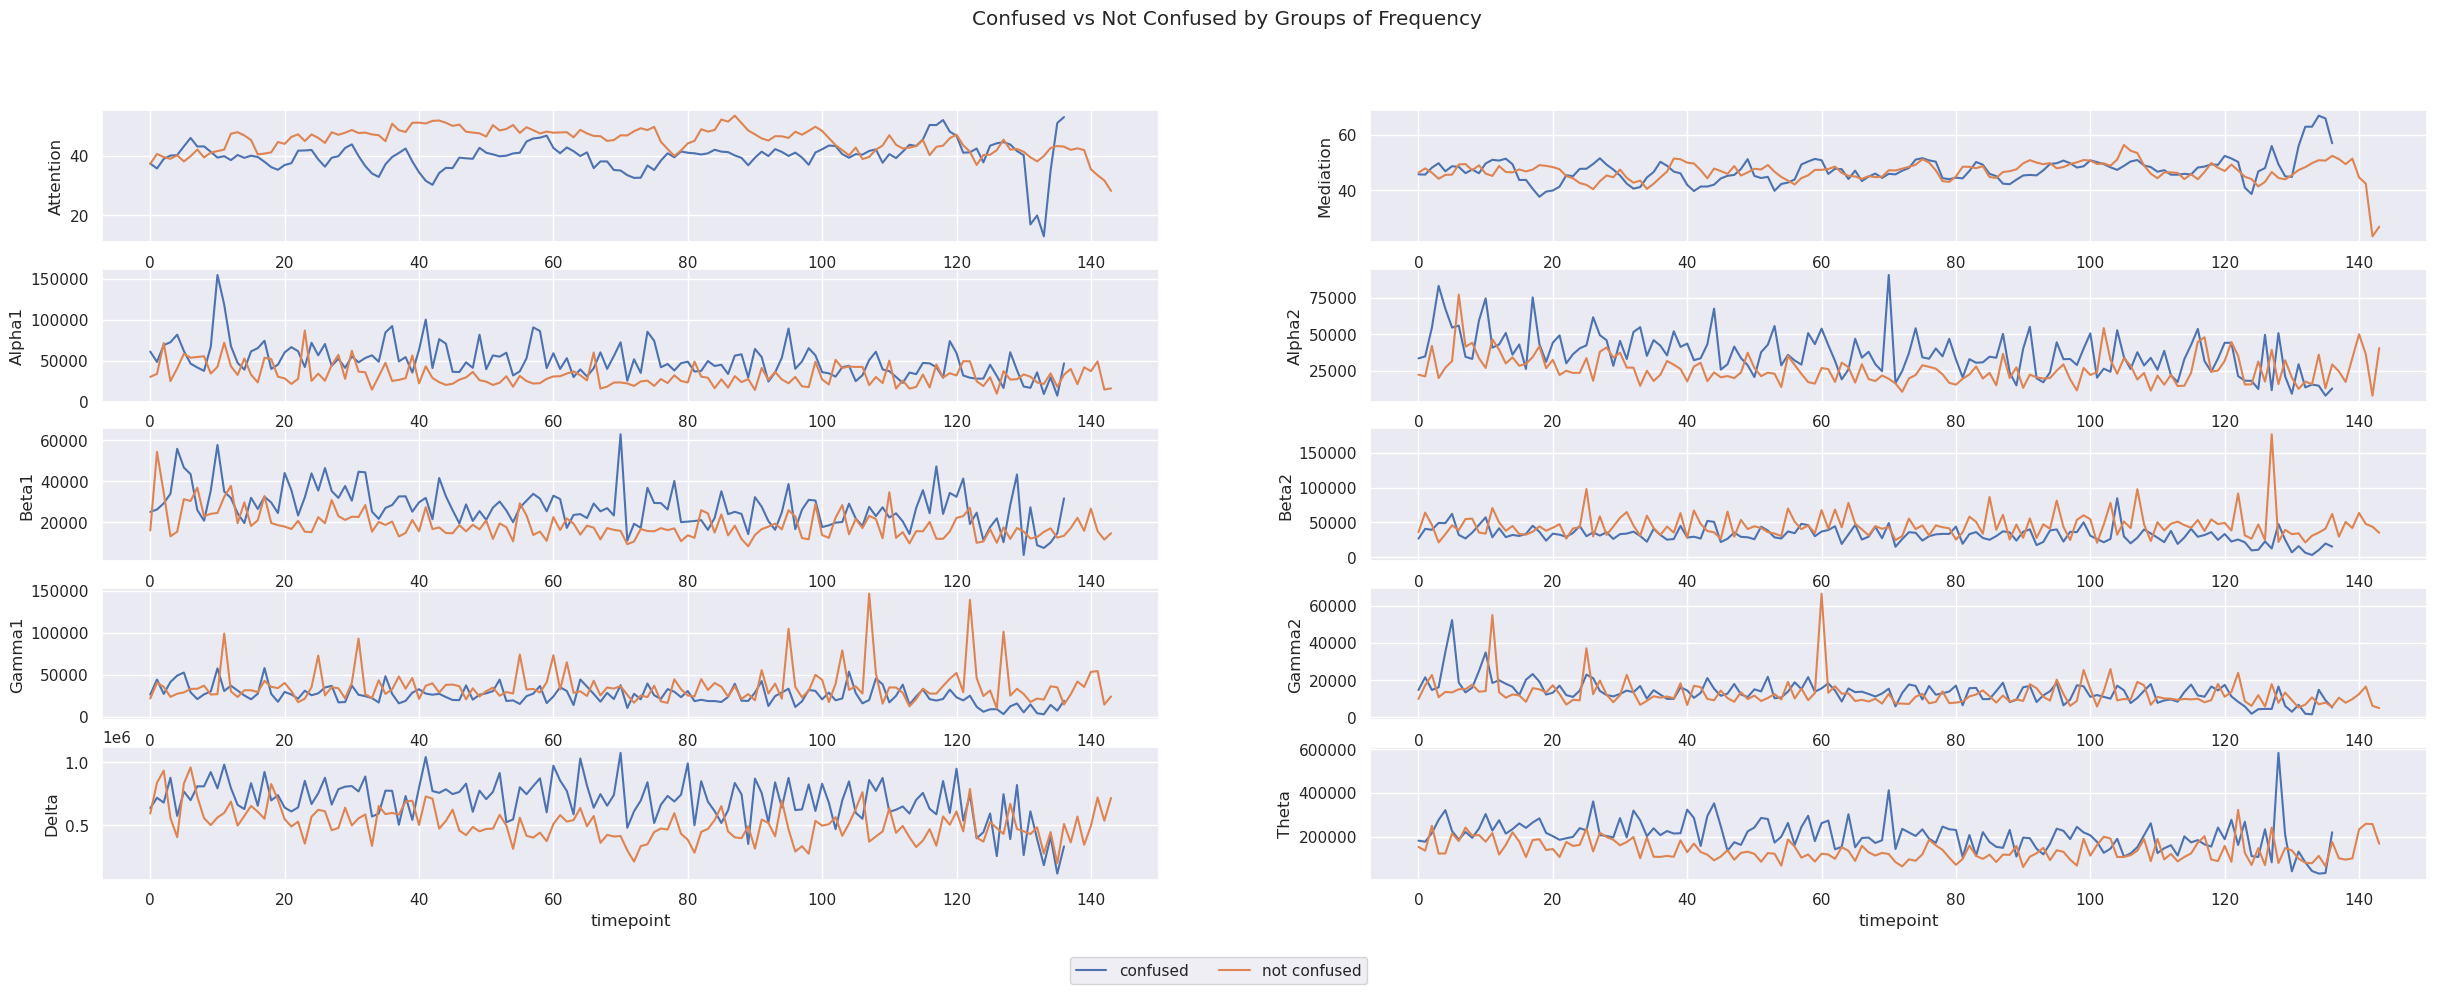

In [10]:
query = "predefinedlabel == 1 & userlabel == 1"
df_confused = df_new.query(query)

query = "predefinedlabel == 0 & userlabel == 0"
df_understand = df_new.query(query)

draw_multiple_figures(df_confused,df_understand)

df_true means the signals labeled by the author`("predefinedlabel")` and labeled by the subjects(`"user-definedlabeln"` as "userlabel")

In [14]:
df_true = df_new.query("(predefinedlabel == 0 & userlabel == 0) | (predefinedlabel == 1 & userlabel == 1)")
X = df_true[['Delta','Theta','Alpha1','Alpha2','Beta1','Beta2','Gamma1','Gamma2']]
# check for any missing values in the data
print(X.isna().sum())
print(X.shape)
Y = df_true.predefinedlabel
print(Y.shape)

Delta     0
Theta     0
Alpha1    0
Alpha2    0
Beta1     0
Beta2     0
Gamma1    0
Gamma2    0
dtype: int64
(6253, 8)
(6253,)


In [17]:
# your_dataframe = pd.DataFrame(df_true)

# # Specify the file path where you want to save the CSV file
# file_path = '../true_df.csv'

# # Save the DataFrame to a CSV file
# your_dataframe.to_csv(file_path, index=False)

In [18]:
print(df_true[df_true['predefinedlabel'] == 1].shape)
print(df_true[df_true['predefinedlabel'] == 0].shape)
print(df_true.shape)

(3079, 16)
(3174, 16)
(6253, 16)


In [15]:
def classify(X,Y):
  import xgboost
  random_state = 42

  x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,
                                  random_state=random_state, stratify=Y)

  model = xgboost.XGBClassifier(base_score=0.5, learning_rate=0.1,max_depth=6,
          objective='binary:logistic', eta=0.01)
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)
  predictions = [round(value) for value in y_pred]

  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, predictions)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))

  ## draw the tree
  from xgboost import plot_tree
  from matplotlib.pylab import rcParams

  rcParams['figure.figsize'] = 80,50

  plot_tree(model)
  plt.show()

  ## show the cross validation result
  from sklearn.model_selection import StratifiedKFold
  from sklearn.model_selection import cross_val_score

  kfold = StratifiedKFold(n_splits=5)
  results = cross_val_score(model, X, Y, cv=kfold)
  print("Cross Validation Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
  print("")
  print("---------------------------------------------------------------------")
  print("")

  ## print feature importance
  print("Feature Importance")
  rcParams['figure.figsize'] = 5,5
  from xgboost import plot_importance
  plot_importance(model)
  plt.show()

Accuracy: 66.59%


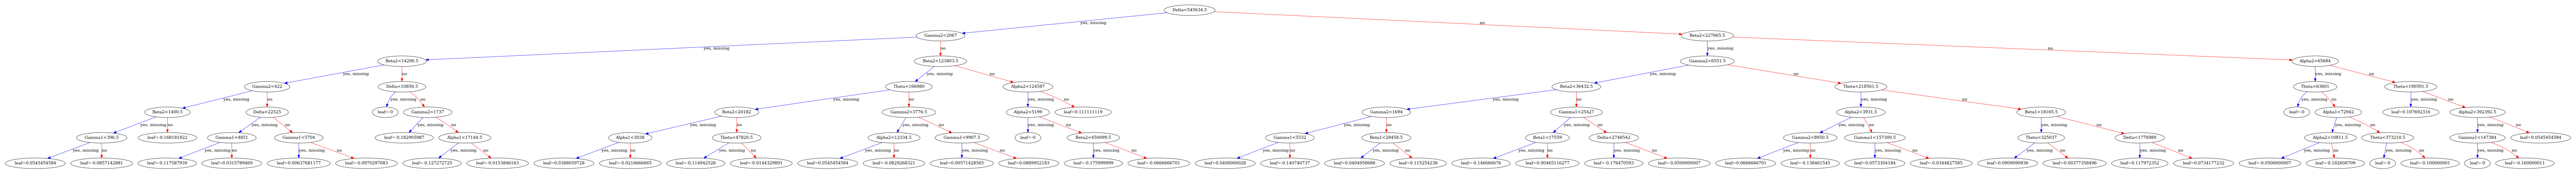

Cross Validation Accuracy: 60.82% (5.96%)

---------------------------------------------------------------------

Feature Importance


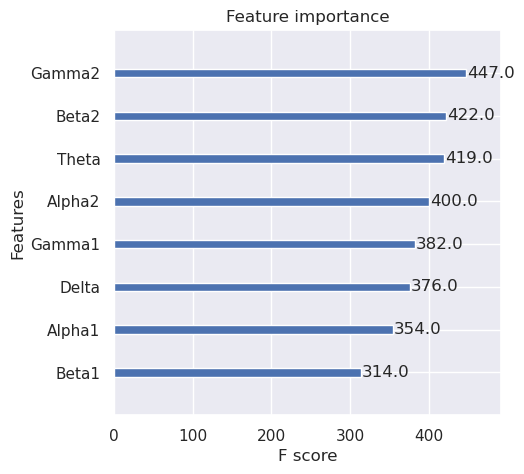

In [16]:
classify(X,Y)

In [17]:
def moving_average(x, w = 10):
    return np.convolve(x, np.ones(w), 'valid') / w

In [ ]:
df_ma = pd.DataFrame(columns=['Attention', 'Mediation', 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'Label'])

for i in range(int(df_true.SubjectID.min()), int(df_true.SubjectID.max()+1)):
    for j in range(int(df_true.VideoID.min()), int(df_true.VideoID.max()+1)):
        for k in range(0, 2):
            if len(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Attention) > 0:
                # Calculate moving averages for different EEG features
                attention = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Attention)
                mediation = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Mediation)
                delta = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Delta)
                theta = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Theta)
                alpha1 = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Alpha1)
                alpha2 = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Alpha2)
                beta1 = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Beta1)
                beta2 = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Beta2)
                gamma1 = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Gamma1)
                gamma2 = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Gamma2)
                
                # Create label array based on predefined label
                if k == 1:
                    label = np.ones(len(attention))
                else:
                    label = np.zeros(len(attention))
                
                # Create timepoint array
                timepoint = np.arange(len(attention))
                
                # Stack arrays and create a DataFrame
                array = np.stack((timepoint, attention, mediation, delta, theta, alpha1, alpha2, beta1, beta2, gamma1, gamma2, label))
                array = np.transpose(array)
                df_temp = pd.DataFrame(array, columns=['timepoint', 'Attention', 'Mediation', 'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'Label'])
                
                # Concatenate the temporary DataFrame with the main DataFrame df_ma
                df_ma = pd.concat([df_ma, df_temp])

print(df_ma)


In [18]:
df_ma = pd.DataFrame(columns = ['Attention','Mediation','Delta','Theta','Alpha1','Alpha2','Beta1','Beta2','Gamma1','Gamma2','Label'])

for i in range(int(df_true.SubjectID.min()), int(df_true.SubjectID.max()+1)):
  for j in range(int(df_true.VideoID.min()), int(df_true.VideoID.max()+1)):
    for k in range(0,2):
      if len(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Attention) > 0 :
        attention = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Attention)
        mediation = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Mediation)
        delta = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Delta)
        theta = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Theta)
        alpha1 = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Alpha1)
        alpha2 = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Alpha2)
        beta1 = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Beta1)
        beta2 = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Beta2)
        gamma1 = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Gamma1)
        gamma2 = moving_average(df_true[(df_true.predefinedlabel == k) & (df_true.SubjectID == i) & (df_true.VideoID == j)].Gamma2)
        if k == 1:
          label = np.ones(len(attention))
        else:
          label = np.zeros(len(attention))
        timepoint = np.arange(len(attention))
        array = np.stack((timepoint, attention, mediation, delta, theta, alpha1, alpha2, beta1, beta2, gamma1, gamma2, label))
        array = np.transpose(array)
        df_temp = pd.DataFrame(array, columns = ['timepoint','Attention','Mediation','Delta','Theta','Alpha1','Alpha2','Beta1','Beta2','Gamma1','Gamma2','Label'])
        df_ma = pd.concat([df_ma, df_temp])

print(df_ma)

     Attention  Mediation     Delta     Theta   Alpha1   Alpha2    Beta1  \
0         45.1       57.0  730906.7  153457.8  59794.7  38078.0  22875.2   
1         44.3       56.5  776426.9  163016.2  56745.4  36063.0  21966.0   
2         44.7       57.8  835799.5  174393.3  64106.5  37462.4  26284.0   
3         44.7       56.4  776500.2  140230.7  44222.4  31877.3  23381.7   
4         44.8       53.7  649042.7  135723.2  38322.3  34043.7  24403.4   
..         ...        ...       ...       ...      ...      ...      ...   
110       59.7       52.9  696266.1  134271.3  24167.2  19734.7  20748.9   
111       59.4       52.6  728067.2  147023.7  47176.4  24000.7  27738.6   
112       56.8       51.9  647406.8  141006.7  45746.4  23283.2  23621.7   
113       55.9       51.9  790189.1  159394.5  47639.8  23119.3  25662.5   
114       54.1       52.1  789421.8  161619.5  47606.7  23170.1  25701.0   

       Beta2   Gamma1   Gamma2  Label  timepoint  
0    54852.8  39680.7  25812.9    0.

In [19]:
X_ma = df_ma[['Delta','Theta','Alpha1','Alpha2','Beta1','Beta2','Gamma1','Gamma2']]
	
print(X.isna().sum())
print(X.shape)
Y_ma = df_ma.Label
print(Y.shape)

Delta     0
Theta     0
Alpha1    0
Alpha2    0
Beta1     0
Beta2     0
Gamma1    0
Gamma2    0
dtype: int64
(6253, 8)
(6253,)


Accuracy: 88.39%


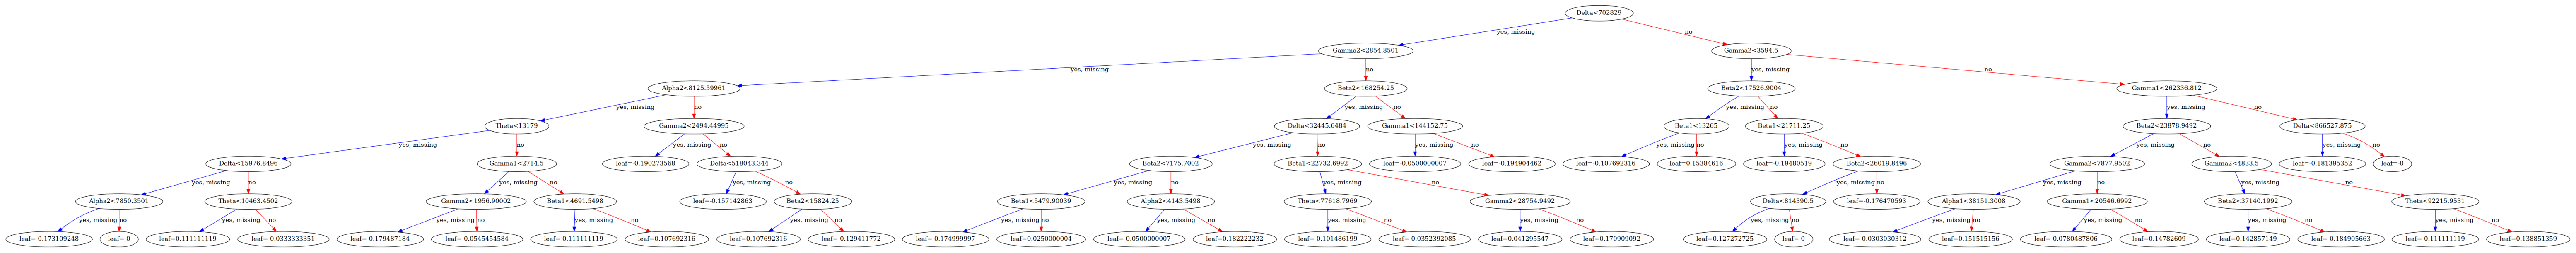

Cross Validation Accuracy: 67.40% (11.27%)

---------------------------------------------------------------------

Feature Importance


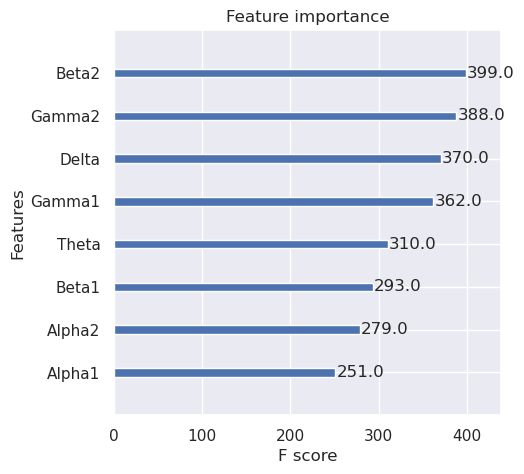

In [20]:
classify(X_ma,Y_ma)

In [36]:
from sklearn.preprocessing import StandardScaler

X_ma = df_ma[['Delta','Theta','Alpha1','Alpha2','Beta1','Beta2','Gamma1','Gamma2']]

x_lstm = StandardScaler().fit_transform(X_ma)
y_lstm = Y_ma

x_train,x_test,y_train,y_test = train_test_split(x_lstm, y_lstm,test_size=0.2, random_state=42, stratify=y_lstm)

x_train.shape, x_test.shape,y_train.shape,y_test.shape

((4649, 8), (1163, 8), (4649,), (1163,))

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [32]:
# Create an SVM classifier
svm_classifier = SVC(random_state=108)

# Train the classifier on the training data
svm_classifier.fit(x_train, y_train)

SVC(random_state=108)

In [33]:
predictions = svm_classifier.predict(x_test).astype(int)
predictions

array([0, 0, 0, ..., 0, 0, 1])

In [34]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7558039552880481

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

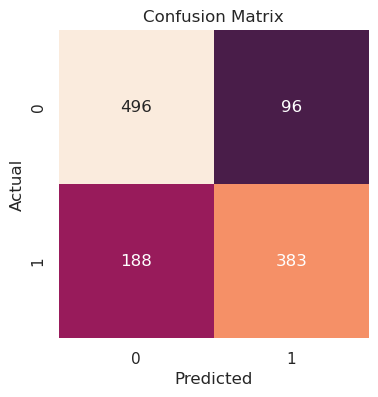

In [38]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(4, 4))

sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks,layers

2023-11-13 16:20:30.128767: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [40]:
inputs = tf.keras.Input(shape=(x_train.shape[1]))
x = tf.keras.layers.Dense(256, activation='relu')(inputs)
x = tf.keras.layers.Dense(256, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model=tf.keras.Model(inputs,outputs)
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy',tf.keras.metrics.AUC(name='auc')]
             )
batch_size=32
epochs=50
history=model.fit(
            x_train,
            y_train,
            validation_split=0.2,
            batch_size=batch_size,
            epochs=epochs,
            callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/50


2023-11-13 16:21:02.609063: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


117/117 [==============================] - 2s 14ms/step - loss: 0.5689 - accuracy: 0.7249 - auc: 0.7714 - val_loss: 0.5280 - val_accuracy: 0.7269 - val_auc: 0.8186 - lr: 0.0010
Epoch 2/50
117/117 [==============================] - 1s 8ms/step - loss: 0.5186 - accuracy: 0.7459 - auc: 0.8173 - val_loss: 0.4920 - val_accuracy: 0.7516 - val_auc: 0.8437 - lr: 0.0010
Epoch 3/50
117/117 [==============================] - 1s 9ms/step - loss: 0.4877 - accuracy: 0.7612 - auc: 0.8381 - val_loss: 0.4777 - val_accuracy: 0.7581 - val_auc: 0.8569 - lr: 0.0010
Epoch 4/50
117/117 [==============================] - 1s 8ms/step - loss: 0.4681 - accuracy: 0.7567 - auc: 0.8523 - val_loss: 0.4634 - val_accuracy: 0.7634 - val_auc: 0.8614 - lr: 0.0010
Epoch 5/50
117/117 [==============================] - 1s 8ms/step - loss: 0.4513 - accuracy: 0.7679 - auc: 0.8636 - val_loss: 0.4546 - val_accuracy: 0.7667 - val_auc: 0.8649 - lr: 0.0010
Epoch 6/50
117/117 [==============================] - 1s 11ms/step - loss: 

In [41]:
model.evaluate(x_test,y_test)

37/37 [==============================] - 0s 6ms/step - loss: 0.2741 - accuracy: 0.8822 - auc: 0.9554


[0.2740609645843506, 0.8822011947631836, 0.9554169178009033]

In [42]:
y_true = np.array(y_test)

y_pred = np.squeeze(model.predict(x_test))
y_pred = np.array(y_pred >=0.5, dtype=np.int)
y_pred

37/37 [==============================] - 0s 8ms/step


/tmp/ipykernel_56661/295032384.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = np.array(y_pred >=0.5, dtype=np.int)


array([0, 0, 0, ..., 0, 0, 1])

In [43]:
accuracyKeras=accuracy_score(y_true, y_pred)
accuracyKeras

0.882201203783319